In [1]:
import numpy as np

In [2]:
with open('../data/Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)

## Word2vec 수행하기

In [3]:
docs_words = [ doc.strip().split() for doc in texts]

In [4]:
docs_words[:3]

[['부산', '행', '때문', '너무', '기대하고', '봤'],
 ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍'],
 ['조금', '전', '보고', '왔', '지루하다', '언제', '끝나', '이', '생각', '드']]

In [5]:
from gensim.models import Word2Vec

In [6]:
w2v_model = Word2Vec(docs_words, window=3, min_count=3, vector_size=100)

In [7]:
w2v_model.wv['이정재']

array([-0.38387907,  0.42131558,  0.64175916,  0.42761642, -0.5234603 ,
       -0.2475167 , -0.11695866,  1.026481  , -0.75440514, -0.38237488,
        0.0834555 , -0.43826392,  0.20682375, -0.52568436,  0.03345223,
       -0.48261356,  0.20876423, -0.6593352 ,  0.03165398, -1.0174468 ,
        0.05520334, -0.02039879,  0.40556973, -1.0962412 , -0.61532944,
        0.49494475, -0.82582325,  0.8468774 ,  0.7792957 ,  0.5866101 ,
       -0.54979026,  0.72355026, -0.40968296,  0.5294785 ,  0.07244971,
        0.71913356,  0.16048692,  0.37456864, -0.23951486, -0.06597734,
        1.1085715 ,  0.21059465, -0.14530928,  0.13114405,  0.12129278,
       -1.0188127 , -0.22546715,  0.04135065,  0.60698074, -0.24123931,
       -0.50958306, -0.11575995, -0.44477528,  0.14434424, -0.7614008 ,
        0.36659527,  0.10636834, -0.0581652 ,  0.4501723 , -0.34222874,
       -0.9290494 , -0.2716245 ,  0.25039014,  0.20487532, -0.69852895,
        0.10946681, -0.64547545, -0.3477754 , -0.5273025 , -0.02

## 각 문서를 word vector를 이용해서 표현

각 문서는 20x100 의 형태로 표현되어야 함.

In [8]:
words_list = [doc.strip().split() for doc in texts]
# 각 문서를 단어들의 리스트 형태로 표현

In [9]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [10]:
from collections import Counter
c = Counter(total_words)

In [11]:
max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000개의 단어들만 선택

In [12]:
words_dic ={}
# 각 단어에 대해서 index 생성하기
for index, word in enumerate(common_words):
    words_dic[word]=index+1
    # 각 단어의 index는 1부터 시작
    # 0은 패딩을 위해 사용하지 않음

In [13]:
id2word = {}
for word in words_dic:
    id2word[words_dic[word]]=word

In [14]:
len(id2word)

10000

In [15]:
id2word

{1: '영화',
 2: '너무',
 3: '봤',
 4: '좋',
 5: '진짜',
 6: '정말',
 7: '보고',
 8: '연기',
 9: '평점',
 10: '스토리',
 11: '배우',
 12: '이',
 13: '점',
 14: '보는',
 15: '감동',
 16: '했',
 17: '시간',
 18: '돈',
 19: '사람',
 20: '그냥',
 21: '본',
 22: '더',
 23: '입니',
 24: '였',
 25: '것',
 26: '이런',
 27: '봐',
 28: '재미',
 29: '하는',
 30: '최고',
 31: '아니',
 32: '내용',
 33: '재미없',
 34: '왜',
 35: '볼',
 36: '감독',
 37: '생각',
 38: '없는',
 39: '말',
 40: '알',
 41: '잘',
 42: '노잼',
 43: '아깝',
 44: '내',
 45: '처음',
 46: '최악',
 47: '할',
 48: '기대',
 49: '없고',
 50: '좀',
 51: '나',
 52: '좀비',
 53: '정도',
 54: '꼭',
 55: '거',
 56: '재밌게',
 57: '그',
 58: '있는',
 59: '알바',
 60: '모르',
 61: '수',
 62: '역시',
 63: '같은',
 64: '하나',
 65: '잼',
 66: '때',
 67: '보면',
 68: '뭐',
 69: '느낌',
 70: '별로',
 71: '완전',
 72: '임',
 73: '마지막',
 74: '재밌었',
 75: '장면',
 76: '개',
 77: '아이',
 78: '없다',
 79: '한',
 80: '들',
 81: '없',
 82: '분',
 83: '안',
 84: '와',
 85: '중간',
 86: '넘',
 87: '재밌어',
 88: '또',
 89: '보세',
 90: '끝',
 91: '이건',
 92: '보다',
 93: '다시',
 94: '걸',
 95: '듯'

In [16]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except:
            pass
    filtered_indexed_words.append(indexed_words)

In [17]:
max_len = 20
# 각 영화평의 길이를 20으로 통일 

In [18]:
from tensorflow.keras.preprocessing import sequence
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

In [19]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 204, 249, 121,   2, 345,   3])

0이면 모두 0으로 채움

In [20]:
zeros_vector = np.zeros(100,dtype="float32")

In [21]:
zeros_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [22]:
X_vectors = []
for doc in X:
    doc_vectors = []
    for token_id in doc:
        if token_id == 0: # token_ID == 0 이면 제로 벡터 사용
            doc_vectors.append(zeros_vector)
        else:
            word = id2word[token_id] #token_id를 이용해서 단어 추출
            vector = w2v_model.wv[word] # 단어의 word2vec 벡터 추출
            doc_vectors.append(vector)
    X_vectors.append(np.array(doc_vectors))

In [23]:
X_vectors = np.array(X_vectors)

In [24]:
X_vectors.shape

(165384, 20, 100)

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow import reshape, shape

In [26]:
input_shape = (20,100)

In [27]:
input = layers.Input(shape=input_shape)
x=layers.Conv1D(32, 5, activation='relu', padding='same')(input)
x=layers.MaxPool1D(2, padding='same')(x)
fc = layers.Flatten()(x)
code = layers.Dense(64, activation="linear")(fc)

decoded = layers.Dense(320, activation="relu")(code)
x = reshape(decoded, (shape(decoded)[0], 10, 32))
x = layers.Conv1DTranspose(32, 2, strides=2, activation="relu")(x)
output = layers.TimeDistributed(layers.Dense(100))(x)
autoencoder = models.Model(input, output)

In [28]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 20, 100)]    0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 20, 32)       16032       ['input_1[0][0]']                
                                                                                                  
 max_pooling1d (MaxPooling1D)   (None, 10, 32)       0           ['conv1d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 320)          0           ['max_pooling1d[0][0]']          
                                                                                              

In [29]:
from tensorflow.keras import optimizers
autoencoder.compile(optimizer=optimizers.Adam(0.001), loss='mse')

In [30]:
history = autoencoder.fit(X_vectors, X_vectors, epochs=50, batch_size=256, validation_split=0.1)

Epoch 1/50
582/582 [==============================] - 6s 9ms/step - loss: 0.2311 - val_loss: 0.1990
Epoch 2/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1887 - val_loss: 0.1831
Epoch 3/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1786 - val_loss: 0.1772
Epoch 4/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1740 - val_loss: 0.1738
Epoch 5/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1713 - val_loss: 0.1717
Epoch 6/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1695 - val_loss: 0.1702
Epoch 7/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1677 - val_loss: 0.1684
Epoch 8/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1661 - val_loss: 0.1670
Epoch 9/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1650 - val_loss: 0.1661
Epoch 10/50
582/582 [==============================] - 5s 8ms/step - loss: 0.1641 - val_loss: 0.1651

In [31]:
# import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

NameError: name 'plt' is not defined

## 인코더 부분을 사용한 감성분석

In [32]:
# 인코더 모형 생성
encoder = models.Model(inputs=input, outputs=code)

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_vectors, labels, test_size=0.1, random_state=0)

In [34]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

517/517 [==============================] - 1s 1ms/step


In [35]:
X_train_encode.shape

(148845, 64)

In [36]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model1.add(layers.Dense(2, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


In [37]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [38]:
model1.compile(optimizer=optimizers.RMSprop(0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [39]:
history = model1.fit(X_train_encode, y_train_one_hot, epochs=20, batch_size=128, 
                     validation_split=0.2)

Epoch 1/20
931/931 [==============================] - 1s 1ms/step - loss: 0.7276 - accuracy: 0.7014 - val_loss: 0.4991 - val_accuracy: 0.7769
Epoch 2/20
931/931 [==============================] - 1s 965us/step - loss: 0.4658 - accuracy: 0.7929 - val_loss: 0.4615 - val_accuracy: 0.7946
Epoch 3/20
931/931 [==============================] - 1s 961us/step - loss: 0.4433 - accuracy: 0.8026 - val_loss: 0.4476 - val_accuracy: 0.7997
Epoch 4/20
931/931 [==============================] - 1s 951us/step - loss: 0.4319 - accuracy: 0.8073 - val_loss: 0.4378 - val_accuracy: 0.8040
Epoch 5/20
931/931 [==============================] - 1s 947us/step - loss: 0.4242 - accuracy: 0.8111 - val_loss: 0.4310 - val_accuracy: 0.8057
Epoch 6/20
931/931 [==============================] - 1s 945us/step - loss: 0.4184 - accuracy: 0.8137 - val_loss: 0.4265 - val_accuracy: 0.8092
Epoch 7/20
931/931 [==============================] - 1s 960us/step - loss: 0.4137 - accuracy: 0.8151 - val_loss: 0.4230 - val_accuracy: 0

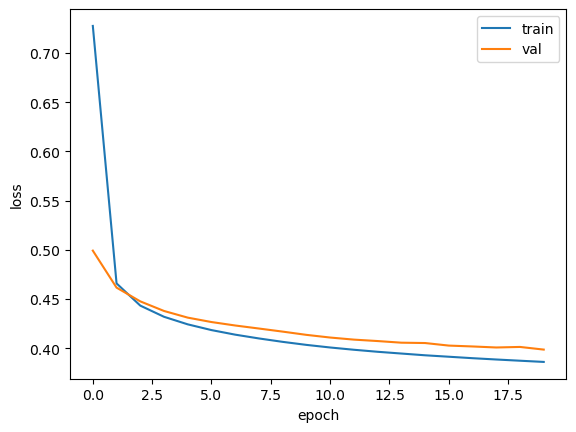

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [41]:
model1.evaluate(X_test_encode, y_test_one_hot)

517/517 [==============================] - 0s 677us/step - loss: 0.3915 - accuracy: 0.8258


[0.3914732038974762, 0.8258056640625]